<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Final Project
<h1 align=center><font size = 3> Classification Machine Learning Model

### The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
<br>
<br>



<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PassengerId</th>
      <th>Survived</th>
      <th>Pclass</th>
      <th>Name</th>
      <th>Sex</th>
      <th>Age</th>
      <th>SibSp</th>
      <th>Parch</th>
      <th>Ticket</th>
      <th>Fare</th>
      <th>Cabin</th>
      <th>Embarked</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0</td>
      <td>3</td>
      <td>Braund, Mr. Owen Harris</td>
      <td>male</td>
      <td>22.0</td>
      <td>1</td>
      <td>0</td>
      <td>A/5 21171</td>
      <td>7.2500</td>
      <td>NaN</td>
      <td>S</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td>Cumings, Mrs. John Bradley (Florence Briggs Th...</td>
      <td>female</td>
      <td>38.0</td>
      <td>1</td>
      <td>0</td>
      <td>PC 17599</td>
      <td>71.2833</td>
      <td>C85</td>
      <td>C</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>1</td>
      <td>3</td>
      <td>Heikkinen, Miss. Laina</td>
      <td>female</td>
      <td>26.0</td>
      <td>0</td>
      <td>0</td>
      <td>STON/O2. 3101282</td>
      <td>7.9250</td>
      <td>NaN</td>
      <td>S</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>1</td>
      <td>1</td>
      <td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>
      <td>female</td>
      <td>35.0</td>
      <td>1</td>
      <td>0</td>
      <td>113803</td>
      <td>53.1000</td>
      <td>C123</td>
      <td>S</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>0</td>
      <td>3</td>
      <td>Allen, Mr. William Henry</td>
      <td>male</td>
      <td>35.0</td>
      <td>0</td>
      <td>0</td>
      <td>373450</td>
      <td>8.0500</td>
      <td>NaN</td>
      <td>S</td>
    </tr>
  </tbody>
</table>
</div>



Data Dictionary taken from https://www.kaggle.com/c/titanic/data


| Variable 	| Definition 	| Key 	|  	|  	|
|-	|-	|-	|-	|-	|
| survived 	| Survival 	| 0 = No, 1 = Yes 	|  	|  	|
| pclass 	| Ticket class 	| 1 = 1st, 2 = 2nd, 3 = 3rd 	|  	|  	|
| sex 	| Sex 	|  	|  	|  	|
| Age 	| Age in years 	|  	|  	|  	|
| sibsp 	| # of siblings / spouses aboard the Titanic 	|  	|  	|  	|
| parch 	| # of parents / children aboard the Titanic 	|  	|  	|  	|
| ticket 	| Ticket number 	|  	|  	|  	|
| fare 	| Passenger fare 	|  	|  	|  	|
| cabin 	| Cabin number 	|  	|  	|  	|
| embarked 	| Port of Embarkation 	| C = Cherbourg, Q = Queenstown, S = Southampton 	|  	|  	|


##### Variable Notes

Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

SibSp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister;  
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
Parent = mother, father; 
Child = daughter, son, stepdaughter, stepson; 
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# Importing all the libraries involved
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier

### Loading the Data

In [2]:
df = pd.read_csv('Titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data Analysis

In [7]:
def BarPlot(var):
    variable = df[var]
    variable_value = variable.value_counts()
    plt.figure(figsize=(12,6))
    sns.countplot(variable)

C:\Users\roytu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roytu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roytu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roytu\anaconda3\lib\si

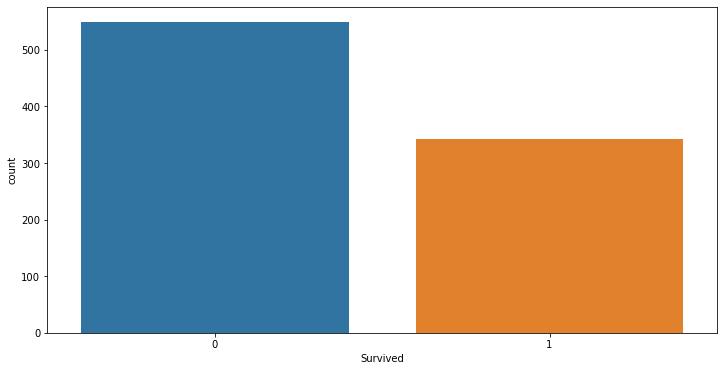

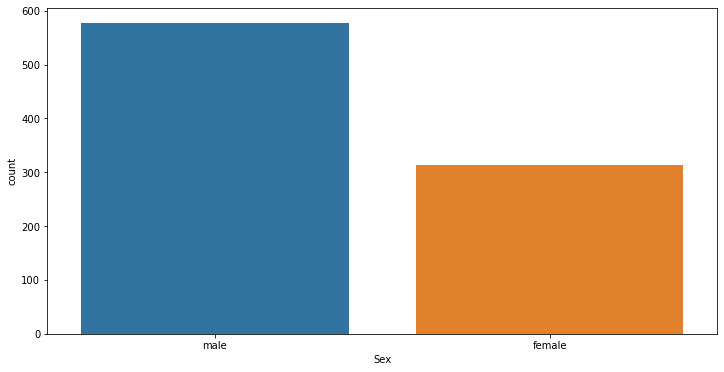

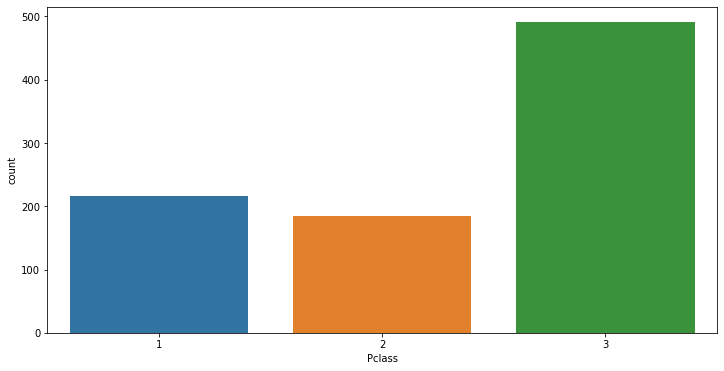

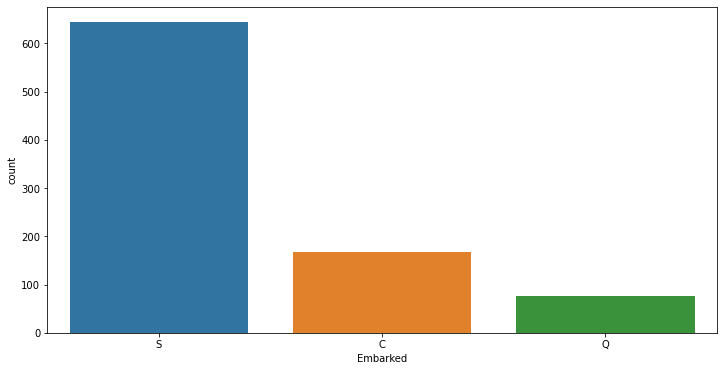

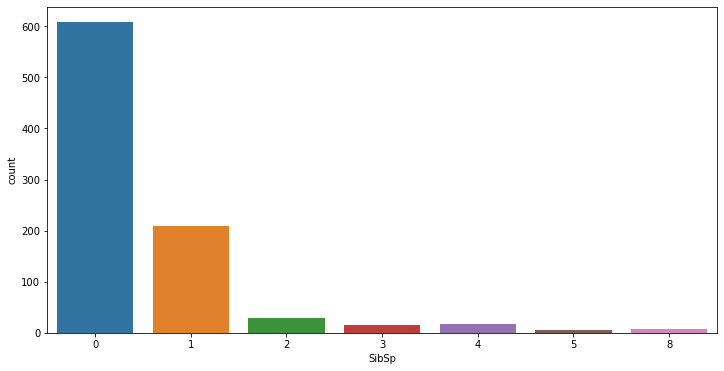

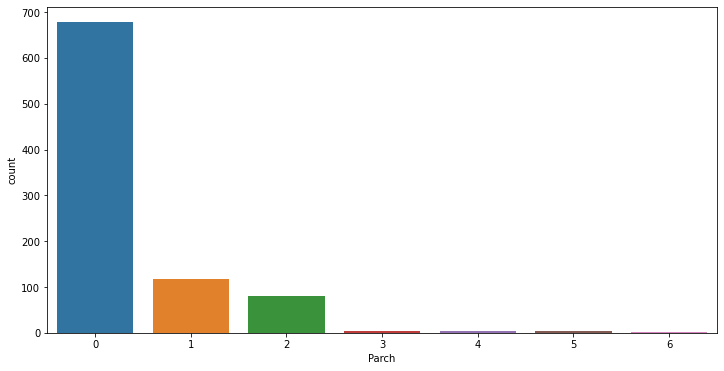

In [8]:
categories1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for category in categories1:
    BarPlot(category)

### Survived Attribute

C:\Users\roytu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

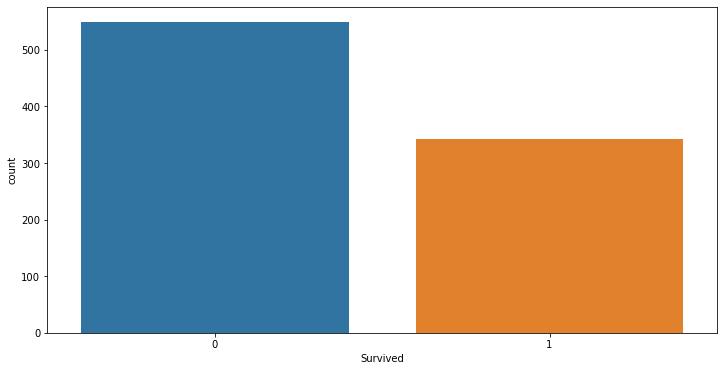

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(df.Survived)

In [10]:
Unsurvived = len(df[df['Survived'] == 0])
Survived = len(df[df['Survived'] == 1])
pct_survive = Survived/(Unsurvived+Survived)
pct_unsurvive= Unsurvived/(Unsurvived+Survived)
print("percentage of those who survived is", pct_survive*100)
print("percentage of those who survived is", pct_unsurvive*100)

percentage of those who survived is 38.38383838383838
percentage of those who survived is 61.61616161616161


###### Ada 38.4% penumpang yang selamat dan 61.6% yang tidak selamat dari tragedi kecelakaan kapal Titanic. 

### Those who survived based on their gender

In [11]:
sex = df.groupby('Survived')['Sex'].value_counts()
sex

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

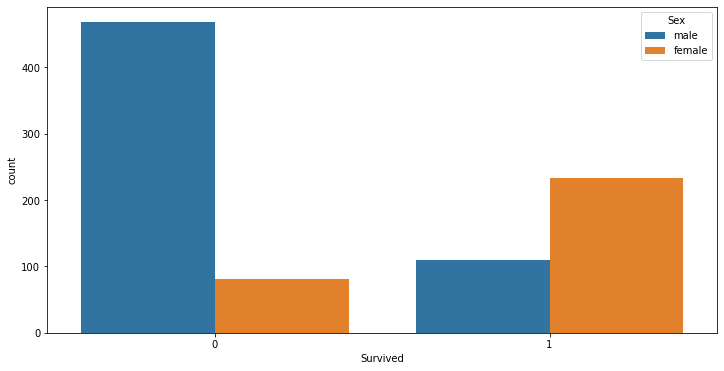

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Survived', data = df, hue = 'Sex')

###### Terlihat bahwa penumpang yang selamat didominasi oleh wanita, dan yang tidak selamat didominasi oleh pria

### Those who survived based on their ticket class

In [13]:
Pclass = df.groupby('Survived')['Pclass'].value_counts()
Pclass

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

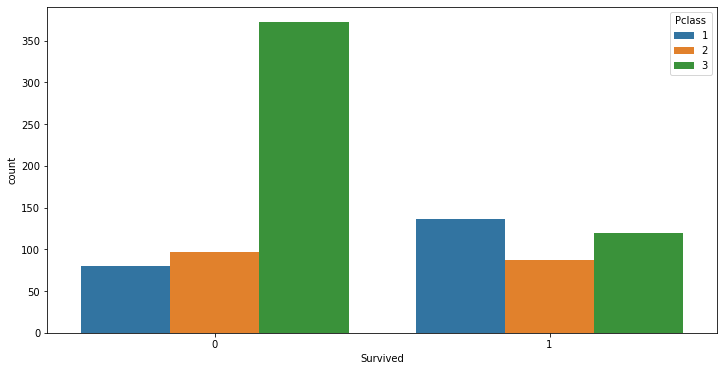

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Survived', data = df, hue = 'Pclass')

###### Terlihat bahwa  penumpang yang selamat cenderung memiliki kelas tiket yang cukup berimbang, tidak seperti penumpang yang tidak selamat yang didominasi oleh penumpang yang memiliki tiket kelas 3

### Those who survived based on their embarkation port

In [15]:
Embar = Pclass = df.groupby('Survived')['Embarked'].value_counts()
Embar

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

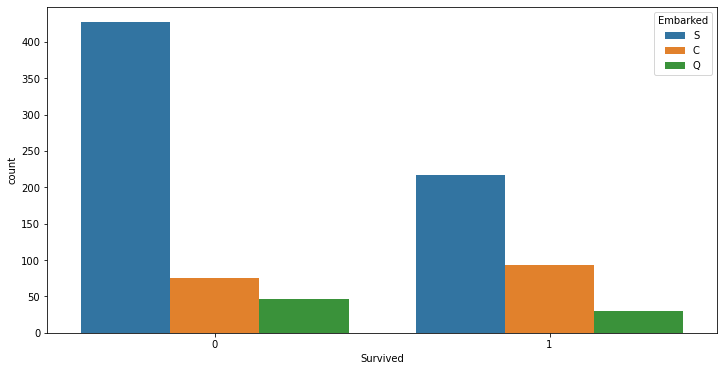

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Survived', data = df, hue = 'Embarked')

###### Dari grafik di atas, terlihat bahwa penumpang Kapal Titanic didominasi oleh penumpang yang berangkat dari Pelabuhan Southampton. Karena, penumpang yang selamat dan yang tidak sama-sama didominasi oleh penumpang yang berangkat dari Pelabuhan Southampton.

### Number of Siblings or Spouses who survived

In [17]:
Sibsp = df.groupby('Survived')['SibSp'].value_counts()
Sibsp

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

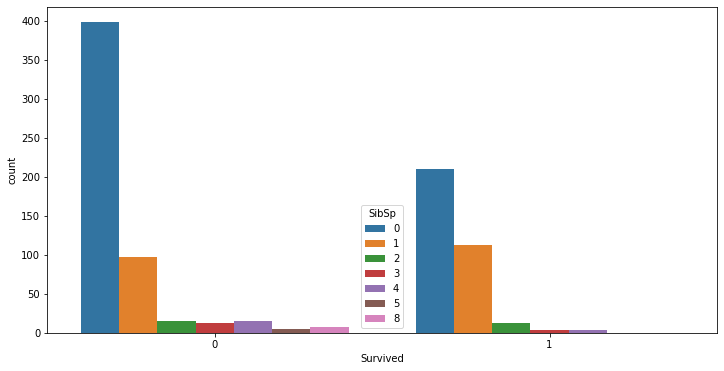

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Survived', data = df, hue = 'SibSp')

###### Dari grafik, terlihat bahwa penumpang didominasi oleh penumpang yang tidak pergi bersama saudara / pasangan mereka.

### Number of Parents or Children who survived

In [19]:
Parch = df.groupby('Survived')['Parch'].value_counts()
Parch

Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

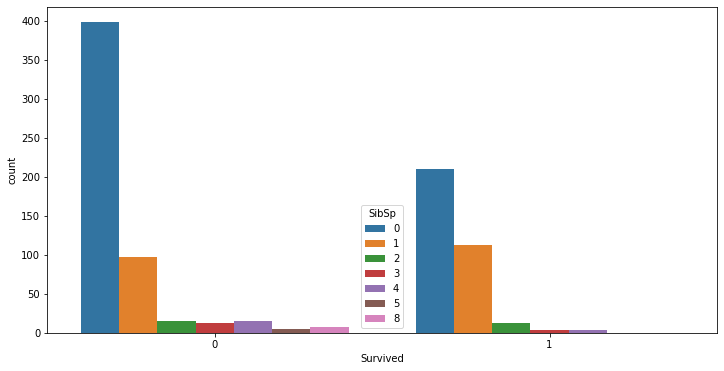

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Survived', data = df, hue = 'SibSp')

###### Dari grafik, terlihat bahwa penumpang didominasi oleh penumpang yang tidak pergi bersama orang tua / anak mereka.

In [21]:
def distplot(var):
    variable = df[var]
    variable_value = variable.value_counts()
    plt.figure(figsize=(12,6))
    sns.distplot(variable)

C:\Users\roytu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roytu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roytu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

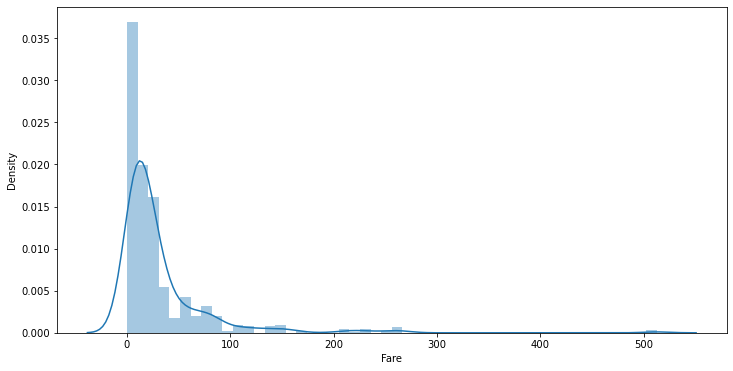

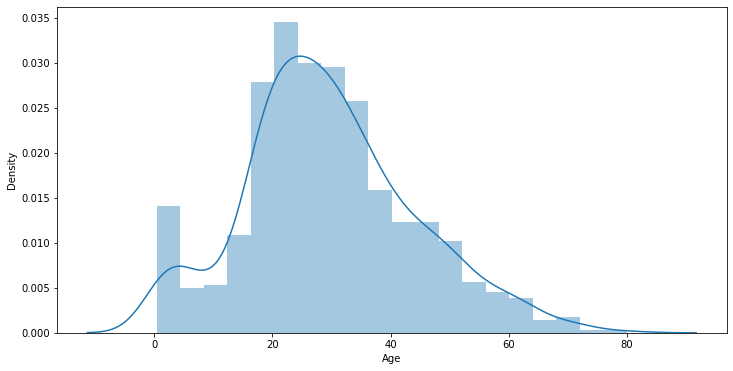

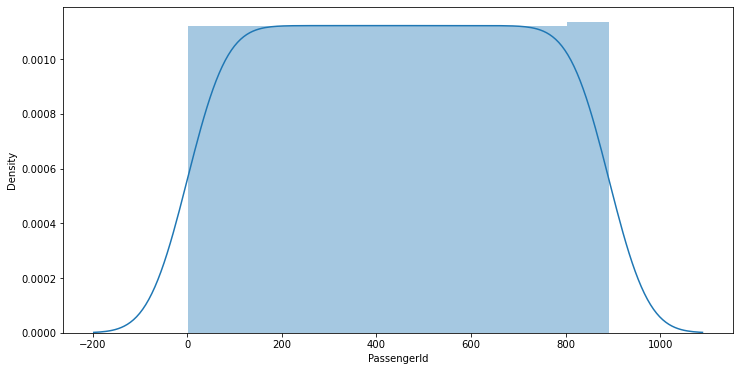

In [22]:
numeric_variables = ["Fare", "Age", "PassengerId"]
for variable in numeric_variables:
    distplot(variable)

#### Dari grafik distribusi, terlihat jelas bahwa atribut 'Fare' dan 'Age' memiliki persebaran yang condong ke kiri. Sedangkan atribut 'PassengerID' memiliki persebaran yang merata sesuai dengan ekspektasi.

# Data Preprocessing 

In [23]:
# Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# Data preprocessing
# data_train['Age'] n/a replaced with mean()
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('')
df['Embarked'] = df['Embarked'].fillna('')
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [25]:
# Encoding all attributes using get dummies
X = df.drop('Survived',1)
X = pd.get_dummies(X)

# X axis
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
y = df.Survived

# Y axis
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
# Training and testing from data

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

# Model Implementation

### Implementing Logistic Regression

In [28]:
model = LogisticRegression()
model.fit (X_train, y_train)
pred_logreg = model.predict(X_test)

print(accuracy_score(y_test,pred_logreg))
matrix_logreg=confusion_matrix(y_test,pred_logreg)
print(matrix_logreg)

0.7723880597014925
[[137  33]
 [ 28  70]]


C:\Users\roytu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Implementing KNeighbors Classifier

In [29]:
kNN=KNeighborsClassifier()
kNN.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
pred_kNN=kNN.predict(X_test)
print(accuracy_score(y_test,pred_kNN))
matrix_kNN=confusion_matrix(y_test,pred_kNN)
print(matrix_kNN)

0.6268656716417911
[[127  43]
 [ 57  41]]


### Implementing Support Vector Machine

In [31]:
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [32]:
pred_SVM=svm_model.predict(X_test)
print(accuracy_score(y_test,pred_SVM))
matrix_SVM=confusion_matrix(y_test,pred_SVM)
print(matrix_SVM)

0.6492537313432836
[[163   7]
 [ 87  11]]


### Implementing Decision Tree

In [33]:
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
pred_dtc=dt.predict(X_test)
print(accuracy_score(y_test,pred_dtc))
matrix_dtc=confusion_matrix(y_test,pred_dtc)
print(matrix_dtc)

0.7798507462686567
[[142  28]
 [ 31  67]]


### Implementing Random Forest

In [35]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
pred_RF=rf.predict(X_test)
print(accuracy_score(y_test,pred_RF))
matrix_RF=confusion_matrix(y_test,pred_RF)
print(matrix_RF)

0.8059701492537313
[[144  26]
 [ 26  72]]


### Implementing Naive Bayes

In [37]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [38]:
pred_NB=nb.predict(X_test)
print(accuracy_score(y_test,pred_NB))
matrix_NB=confusion_matrix(y_test,pred_NB)
print(matrix_NB)

0.44029850746268656
[[ 32 138]
 [ 12  86]]


# What Do We Get???

In [39]:
Logistic_Regression = accuracy_score(y_test,pred_logreg)
K_Nearest_Neighbors = accuracy_score(y_test,pred_kNN)
Support_Vector_Machine = accuracy_score(y_test,pred_SVM)
Decision_Tree = accuracy_score(y_test,pred_dtc)
Random_Forest = accuracy_score(y_test,pred_RF)
Naive_Bayes = accuracy_score(y_test,pred_NB)
models = [Logistic_Regression,K_Nearest_Neighbors,Support_Vector_Machine,Decision_Tree,Random_Forest,Naive_Bayes]

In [40]:
print("Logistic Regression:", Logistic_Regression)
print("KNN:", K_Nearest_Neighbors)
print("SVM:", Support_Vector_Machine)
print("Decision Tree:", Decision_Tree)
print("Random Forest:", accuracy_score(y_test,pred_RF))
print("Naive Bayes:", Naive_Bayes)

Logistic Regression: 0.7723880597014925
KNN: 0.6268656716417911
SVM: 0.6492537313432836
Decision Tree: 0.7798507462686567
Random Forest: 0.8059701492537313
Naive Bayes: 0.44029850746268656


No handles with labels found to put in legend.


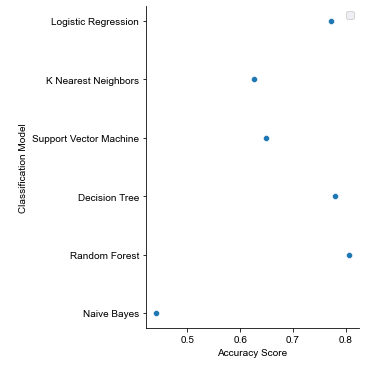

In [41]:
# Visualize for better understanding

Predict = np.array(models)
ser = pd.Series(Predict, index = ['Logistic Regression','K Nearest Neighbors',
                                  'Support Vector Machine','Decision Tree','Random Forest','Naive Bayes'])
%matplotlib inline

sns.relplot(x=ser,y=ser.index)
sns.set_style("darkgrid")
# Add labels
plt.xlabel('Accuracy Score')
plt.ylabel('Classification Model')
plt.legend()
plt.show()

Dari 5 model yang diterapkan dengan proporsi latihan sebesar 70% dari data;

Model Random Forest memiliki accuracy score terbaik dibanding model yang lain.

In [42]:
#Checking Important Features

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train,y_train)

feature_imp = pd.Series(clf.feature_importances_,index = X.columns).sort_values(ascending=False)
z = feature_imp.head()
z

Sex_female     0.116561
Sex_male       0.093675
Fare           0.062097
Age            0.049196
PassengerId    0.045242
dtype: float64

No handles with labels found to put in legend.


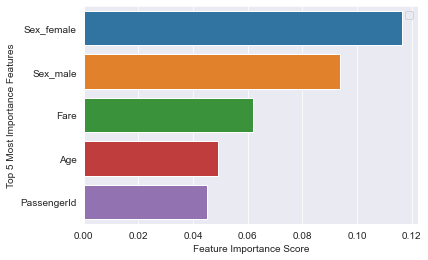

In [43]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x=z,y=z.index)

# Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Top 5 Most Importance Features')
plt.legend()
plt.show()

Berdasarkan feature importance score, dapat dilihat bahwa atribut "Sex_male" dan "Sex_female" memiliki score tertinggi.

Ini menunjukkan bahwa gender seorang penumpang merupakan prediktor tertinggi yang menentukan apakah penumpang tersebut akan selamat atau tidak. Mungkin saat tragedi kecelakaan Kapal Titanic, penumpang perempuan lebih diprioritaskan untuk memakai kapal sekoci.

# Conclusion

##### "What sorts of people were more likely to survive?" 
Dari hasil yang diperoleh, kita bisa melihat bahwa keselamatan penumpang dipengaruhi oleh beberapa prediktor, seperti 'Sex', 'Age' dan 'Fare'.  Penumpang wanita lebih mungkin untuk selamat dibanding penumpang pria. Penumpang berumur muda lebih mungkin untuk selamat dibanding dengan penumpang tua. Dan, penumpang dengan tingkat ekonomi yang relatif lebih tinggi lebih mungkin untuk selamat dibanding dengan penumpang dengan tingkat ekonomi relatif rendah.